# 4.Create an optimization to optimize a set of parameters for a curve of a 5th order polynomial 

1. Give a range for x and randomly select some points (N points as targets) of polynomial:


> 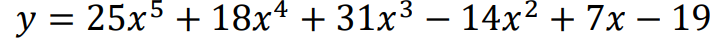


 
2. Use GA to find these targets and generate a new line that should match the polynomial.

In [2]:
import functools as ft
import matplotlib.pyplot as plt
import random 
from random import randint
from operator import add



> 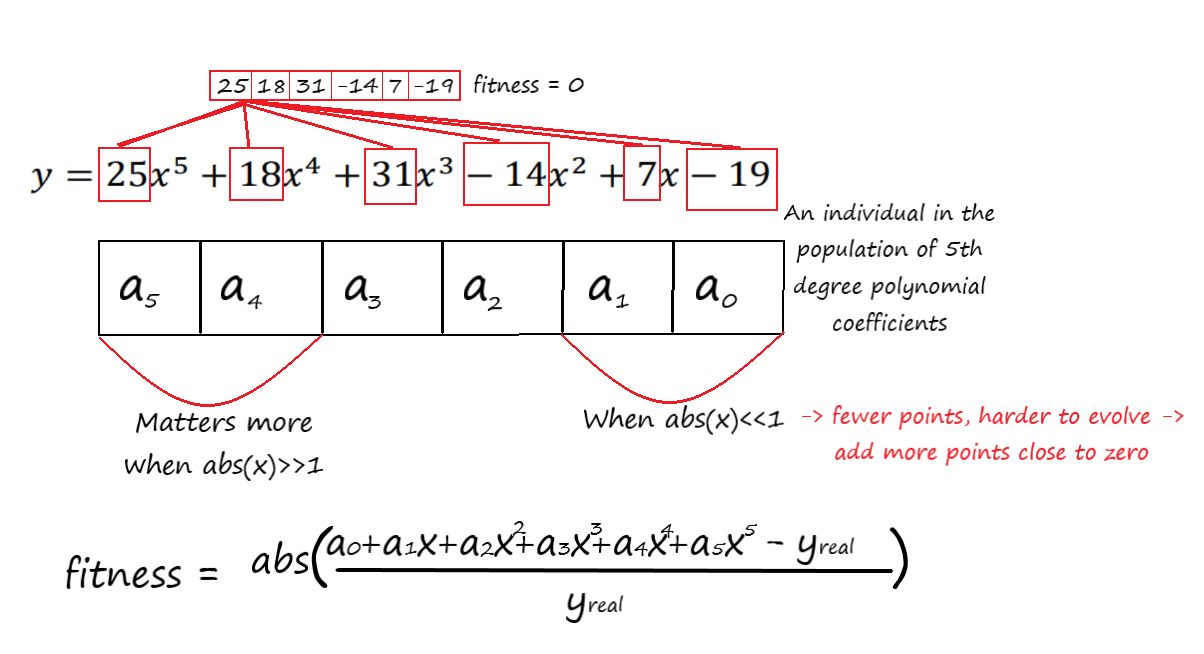



[0.86, 69.6, 0.59, 0.17, -71.6, -0.8, -78.0, 10.9, -48.3, -0.53, -0.67, 86.4, -0.44, 36.2, -28.2, 0.65, 57.5, 0.36, 0.09, 20.6, 0.89, 60.1, 28.3, 30.6, -2.0, 38.0, -30.8, -0.75, 0.74, 0.55, 0.46, 0.83, 89.7, -28.6, -0.42, -21.9, 0.21, 0.19, -0.36, 0.44, 80.1, -65.6, -79.7, 0.76, -17.5, -97.5, 28.0, 73.1, 47.4, 5.6, 31.0, -42.6, -0.61, -0.71, 72.8, -22.3, 0.87, 0.2, 8.1, -0.02, 0.28, 9.0, -24.1, -0.19, 39.9, 22.4, 0.77, -83.7, 38.9, -0.08, -0.2, -99.4, -0.59, -90.5, 29.4, 0.49, 0.45, -11.0, 0.3, 0.43, -61.1, -34.6, 0.64, 0.73, -0.17, 0.75, -26.7, -0.23, 0.5, 87.7, 0.07, -0.98, -24.2, -0.88, 64.3, 0.25, 0.02, -0.86, 91.6, 0.68, -89.6, -0.03, -0.46, -17.2, -38.4, 0.4, 0.95, 0.35, 65.3, 0.63, 0.57, -77.5, -44.2, -0.01, 0.11, -84.1, 0.08, 0.16, -85.8, -8.7, 0.58, 88.5, 0.88, -77.2, 17.6, 0.67, 48.0, -0.57, 0.53, 66.0, 0.18, 0.82, -97.3, -90.6, 0.62, -0.65, 95.4, -0.78, -39.7, -1.0, 0.22, -0.62, 89.2, 55.9, 0.27, -0.77, 24.8, -24.6, 0.71, 0.12, -39.6, -97.0, -88.6, 83.6, 0.99, 75.7, 0.92, 0.

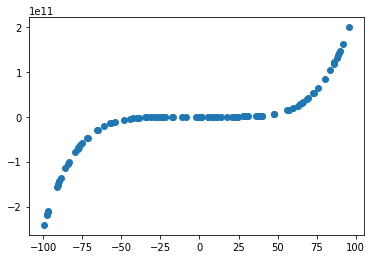

In [3]:
#Selecting random points and storing them in a list X
random.seed(42)
H_large_minus = random.sample(range(-1000,10), 50)
H_large_plus = random.sample(range(10,1000), 50)
H_small = random.sample(range(-100, 100), 100)
X=[]
for h in H_large_minus:
  X.append(h/10)
for h in H_large_plus:
  X.append(h/10)
for h in H_small:
  X.append(h/100)
random.shuffle(X)
print(X)
#calculating Y points
Y=[]
for x in X:
  Y.append(25*(x**5)+18*(x**4)+31*(x**3)-14*(x**2)+7*x-19)
print(Y)
plt.scatter(X,Y)
plt.show()

In [4]:
def individual():
  #returns 6 random parameters at powers of x
   return [ randint(-50,50) for x in range(6) ] 
def population(count=1000,pop=[0]):
  if pop==[0]:
    return [ individual() for n in range(count) ]
  else:
    return pop
 #target is one of n points,i.e respective y value
def fitness(individual, y_real, x_real):
  y_generated=0
  i=0
  for ind in individual :
    y_generated += ind * (x_real**i)
    i+=1
  return abs((y_real-y_generated)/y_real) # relative error
def grade(pop, target,x_real):
  summed=0
  for p in pop:
    summed += fitness(p, target,x_real)
  return summed/len(pop)
def evolve(pop, target,x_real, retain=0.3, random_select=0.03, mutate=0.02):
    graded = [ (fitness(x, target,x_real), x) for x in pop]
    graded = [ x[1] for x in sorted(graded)]
    retain_length =  int(len(graded)*retain)
    parents = graded[:retain_length]
    for individual in graded[retain_length:]:
      if random_select > random.random():
        parents.append(individual)
    for individual in parents:
      if mutate > random.random():
        pos_to_mutate = random.randint(0, len(individual)-1)
        individual[pos_to_mutate] = randint(min(individual),max(individual))
    parents_length = len(parents)
    desired_length = len(pop)- parents_length
    children = []
    while len(children) < desired_length :
      male = random.randint(0, parents_length-1)
      female = random.randint(0, parents_length-1)
      if male != female :
        male=parents[male]
        female=parents[female]
        half = (len(male)/2)
        child = male[:int(half)] + female[int(half):]
        children.append(child)
    parents.extend(children)
    return(parents)

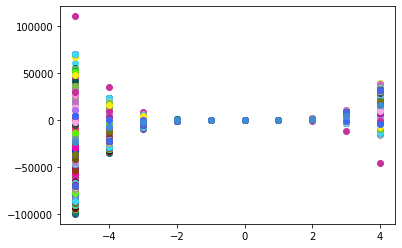

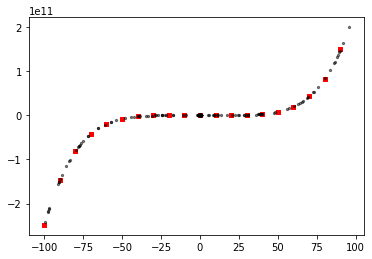

0.046077336160771656
[-14.892  21.005 -10.072  24.602  17.948  24.796]


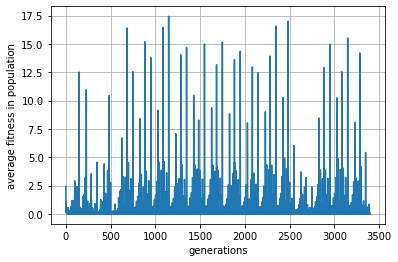

In [5]:
target = Y
x_real=X
k=0
j=0
generations = 17
p = population(1000)
fitness_history = [grade( p, target[0],x_real[0]) , ]
colours = []
# colours for coefficients' evolution
for i in range(len(x_real)):
  colours.append('#%06X' % randint(0, 0xFFFFFA))
# evolutin block
for i in range(generations):
  if fitness_history[-1]<0.005:
    break
  for k in range(len(x_real)):
     p = evolve( p , target[k],x_real[k] )
     fitness_history.append(grade( p , target[k],x_real[k] ) )
     for t in range(-5,5,1):
       j=0
       y_gen=0
       for w in p[3]:
         y_gen+=w*(t**j)
         j+=1
       c=colours[k]
       plt.scatter(t,y_gen,color=c)
plt.show()

for t in range(-100,100,10):
    j=0
    y_gen=0
    for w in p[42]:
      y_gen+=w*(t**j)
      j+=1
    c=colours[k]
    plt.scatter(t,y_gen,s=20,color="red",marker='s')
plt.scatter(X,Y,s=5,color="black",alpha=0.5)
plt.show()

plt.plot(fitness_history)
plt.grid()
plt.ylabel('average fitness in population')
plt.xlabel('generations')
print(fitness_history[-1])
import numpy
coefficients=numpy.array([0,0,0,0,0,0])
for q in p:
  coefficients+=numpy.array(q)

print(coefficients/len(p))






>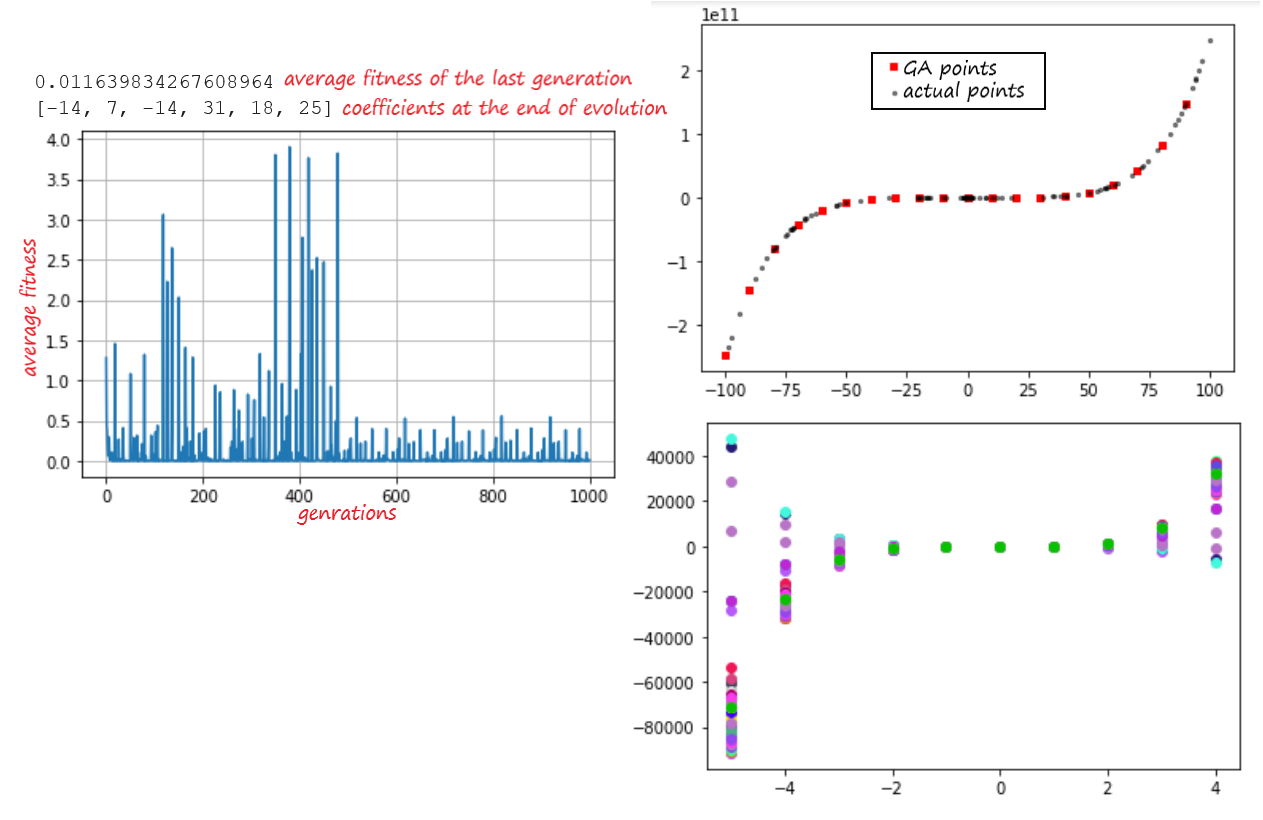



> 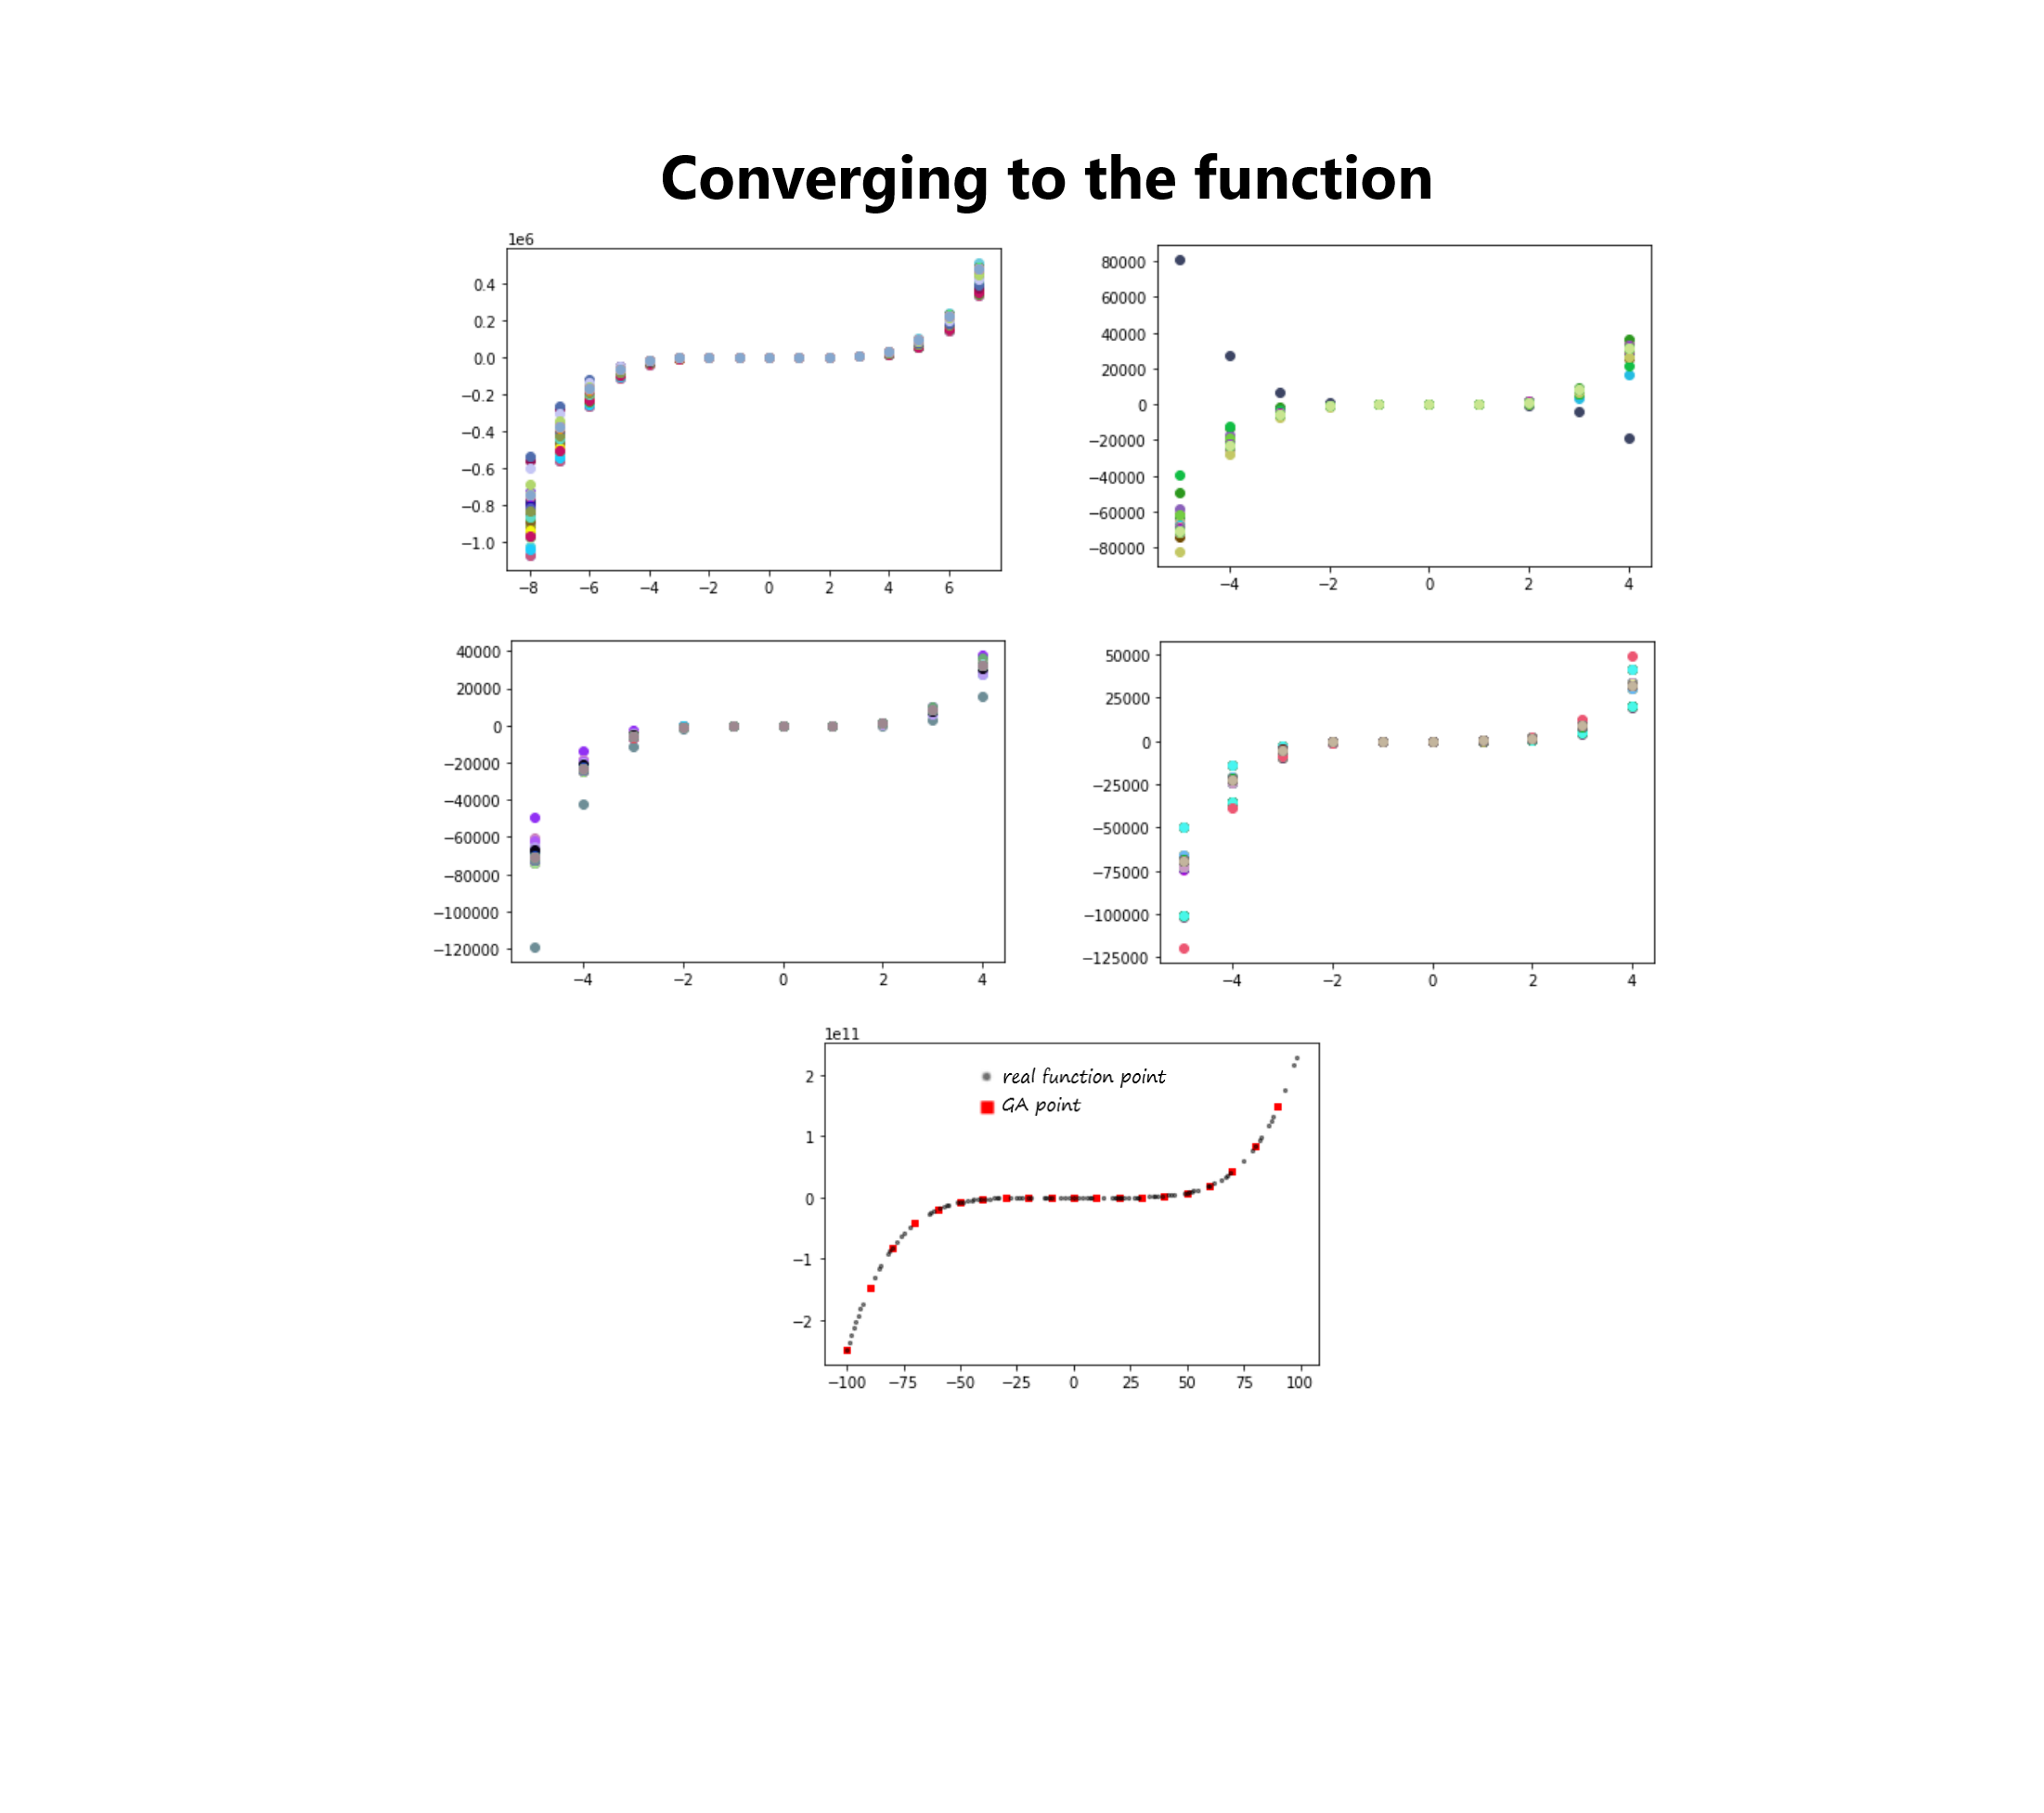



# Using other fitness function:

[-99.4, -28.6, 57.5, -0.4, -28.2, -0.49, -0.9, -77.2, 17.7, 0.96, 0.79, 0.03, -0.13, 0.86, 37.3, 0.91, 0.38, 0.52, 0.81, 0.37, 39.8, -71.6, -0.6, 47.4, -24.2, 39.9, 0.26, 0.43, -48.3, 13.7, 96.9, -71.9, -85.8, 29.4, -13.3, -33.5, 28.6, -0.54, 68.7, -0.72, 0.78, -97.5, -53.0, 88.5, 0.48, 0.11, -0.02, 28.3, 5.6, -54.1, 0.59, 38.3, -84.1, 0.73, -76.2, -2.0, 0.61, -0.61, 0.95, 75.6, 22.4, -0.25, -0.34, 91.6, 0.21, 30.6, -0.32, -0.05, 0.92, 0.18, 0.25, 38.9, 64.3, -0.67, -0.46, -11.0, 0.9, 23.4, -0.2, -78.0, 0.3, -0.44, 9.0, 0.28, 65.3, -0.88, 0.27, 0.06, -0.31, 17.6, -0.79, -89.6, 70.9, 0.56, -22.3, 9.1, 0.31, 0.1, -90.1, 0.22, 0.67, 55.6, 86.4, 89.7, -79.7, -0.7, 0.94, 31.0, 0.75, 0.93, 0.54, -64.8, -30.8, 24.3, 0.65, 0.02, 20.6, -77.5, 38.0, 0.41, -0.64, -63.3, 0.68, 0.46, -0.55, 0.89, 8.1, 0.55, -65.6, -77.7, 0.45, 0.01, -83.7, -0.84, -0.86, -0.5, -0.36, 80.1, -0.77, 0.34, -91.1, -73.0, 73.1, 0.16, -17.5, 0.6, -0.37, 0.62, 60.1, 58.0, 85.9, 72.8, -34.6, 69.6, -0.16, -0.59, 67.3, 0.72, -

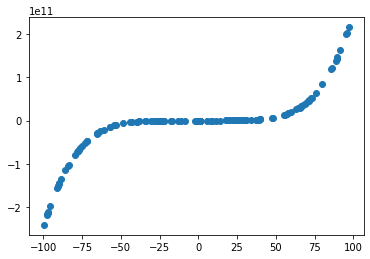

In [2]:
#Selecting random points and storing them in a list X
random.seed(42)
H_large_minus = random.sample(range(-1000,10), 60)
H_large_plus = random.sample(range(10,1000), 60)
H_small = random.sample(range(-100, 100), 120)
X_2=[]
for h in H_large_minus:
  X_2.append(h/10)
for h in H_large_plus:
  X_2.append(h/10)
for h in H_small:
  X_2.append(h/100)
random.shuffle(X_2)
print(X_2)
#calculating Y points
Y_2=[]
for x in X_2:
  Y_2.append(25*(x**5)+18*(x**4)+31*(x**3)-14*(x**2)+7*x-19)
print(Y_2)
plt.scatter(X_2,Y_2)
plt.show()

In [3]:
def individual():
  #returns 6 random parameters at powers of x
   return [ randint(-50,50) for x in range(6) ] 
def population(count=1000,pop=[0]):
  if pop==[0]:
    return [ individual() for n in range(count) ]
  else:
    return pop
 #fitness found as average through all the points
def fitness(individual, Y_real, X_real):
  y_generated=0
  i=0
  sum=0
  for l in range(len(Y_real)):
    y_generated=0
    i=0
    for ind in individual :
      y_generated += ind * (X_real[l]**i)
      i+=1
    sum+=abs((Y_real[l]-y_generated)/Y_real[l])
  return sum/len(Y_real)
def grade(pop, target,x_real):
  summed=0
  for p in pop:
    summed += fitness(p, target,x_real)
  return summed/len(pop)
def evolve(pop, target,x_real, retain=0.3, random_select=0.03, mutate=0.02):
    graded = [ (fitness(x, target,x_real), x) for x in pop]
    graded = [ x[1] for x in sorted(graded)]
    retain_length =  int(len(graded)*retain)
    parents = graded[:retain_length]
    for individual in graded[retain_length:]:
      if random_select > random.random():
        parents.append(individual)
    for individual in parents:
      if mutate > random.random():
        pos_to_mutate = random.randint(0, len(individual)-1)
        individual[pos_to_mutate] = randint(min(individual),max(individual))
    parents_length = len(parents)
    desired_length = len(pop)- parents_length
    children = []
    while len(children) < desired_length :
      male = random.randint(0, parents_length-1)
      female = random.randint(0, parents_length-1)
      if male != female :
        male=parents[male]
        female=parents[female]
        half = (len(male)/2)
        child = male[:int(half)] + female[int(half):]
        children.append(child)
    parents.extend(children)
    return(parents)

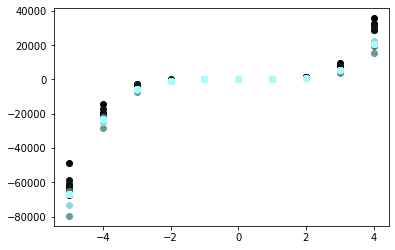

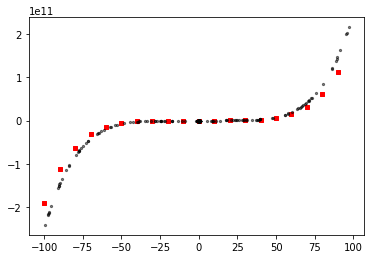

0.2654164735378655
[-25.854   3.11   16.676  34.97   -5.938  19.012]


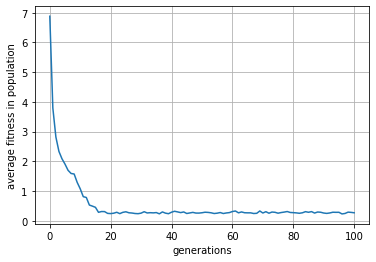

In [4]:
target = Y_2
x_real=X_2
j=0
generations = 100
p = population(1000)
fitness_history = [grade( p, target,x_real) , ]
colours = []
cstr=''
# colours for coefficients' evolution
for i in range(len(x_real)):
  colours.append( (i/150, i/100, i/100))
# evolutin block
for i in range(generations):
     p = evolve( p , target,x_real)
     fitness_history.append(grade( p , target,x_real ) )
     for t in range(-5,5,1):
       j=0
       y_gen=0
       for w in p[3]:
         y_gen+=w*(t**j)
         j+=1
       c=colours[i]
       plt.scatter(t,y_gen,color=c)
plt.show()

for t in range(-100,100,10):
    j=0
    y_gen=0
    for w in p[42]:
      y_gen+=w*(t**j)
      j+=1
    c=colours[i]
    plt.scatter(t,y_gen,s=20,color="red",marker='s')
plt.scatter(X_2,Y_2,s=5,color="black",alpha=0.5)
plt.show()

plt.plot(fitness_history)
plt.grid()
plt.ylabel('average fitness in population')
plt.xlabel('generations')
print(fitness_history[-1])
import numpy
coefficients=numpy.array([0,0,0,0,0,0])
for q in p:
  coefficients+=numpy.array(q)

print(coefficients/len(p))




# 5. Holland’s Schema Theorem. Design and results based on Holland’s Schema Theorem



> 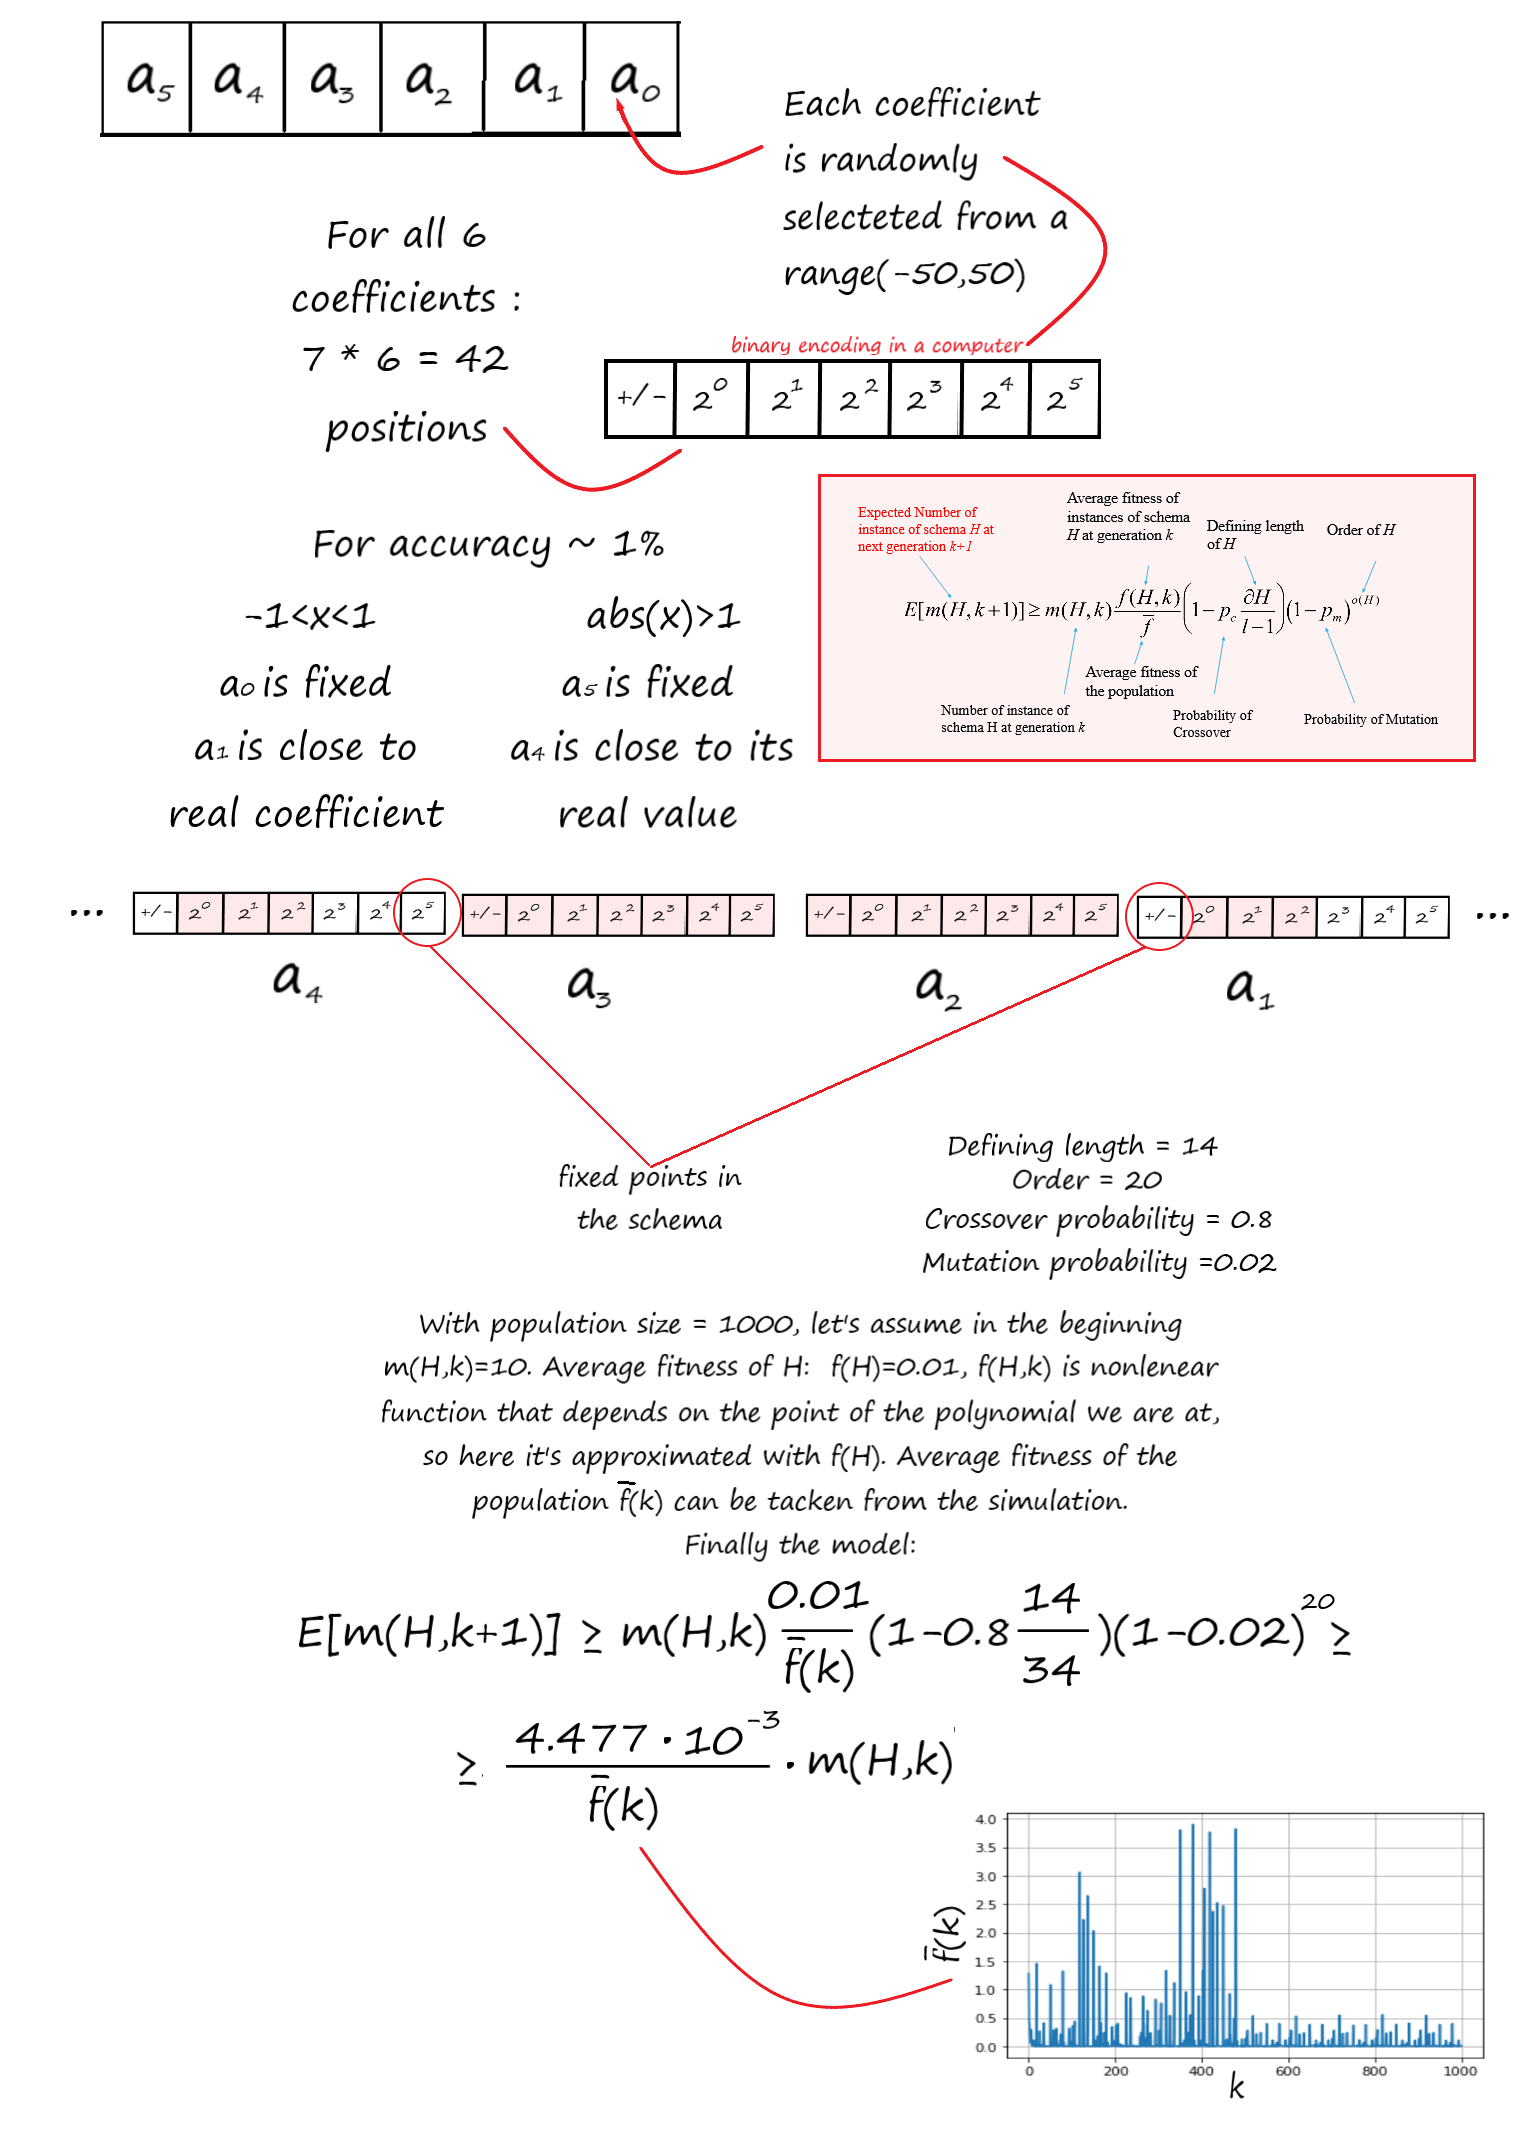
